In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# DELIVERY TIME

In [20]:
data=pd.read_csv("delivery_time.csv")
df=pd.DataFrame(data)
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [21]:
data_del= df.rename({'Delivery Time':'delivery_time','Sorting Time':'sorting_time'}, axis=1)
data_del.head()

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [22]:
df.shape

(21, 2)

In [23]:
df.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [25]:
df[df.duplicated()].shape

(0, 2)

## Checking for outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x23aad9084a8>,
 'caps': [<matplotlib.lines.Line2D at 0x23aad908a58>,
 'boxes': [<matplotlib.lines.Line2D at 0x23aad908198>],
 'medians': [<matplotlib.lines.Line2D at 0x23aad908f98>],
 'fliers': [<matplotlib.lines.Line2D at 0x23aad916320>],
 'means': []}

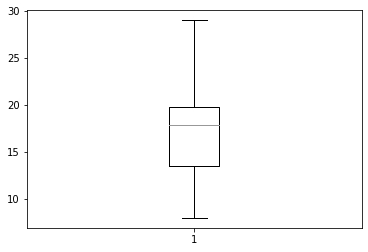

In [27]:
plt.boxplot(data_del["delivery_time"])

{'whiskers': [<matplotlib.lines.Line2D at 0x23aad972ac8>,
 'caps': [<matplotlib.lines.Line2D at 0x23aad972fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x23aad972780>],
 'medians': [<matplotlib.lines.Line2D at 0x23aad9805c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x23aad980898>],
 'means': []}

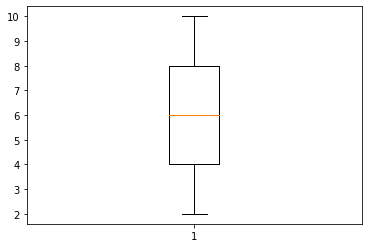

In [28]:
plt.boxplot(data_del["sorting_time"])

### therefore no outliers detected.

## Transformation

## To distribute data normally

array([[<AxesSubplot:title={'center':'delivery_time'}>]], dtype=object)

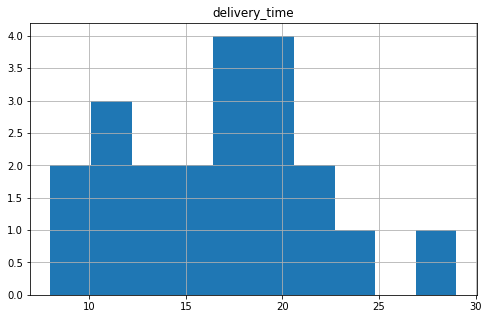

In [30]:
data_del['log-delv']=np.log(data_del["delivery_time"])
data_del.hist('delivery_time',figsize=(8,5))

array([[<AxesSubplot:title={'center':'sorting_time'}>]], dtype=object)

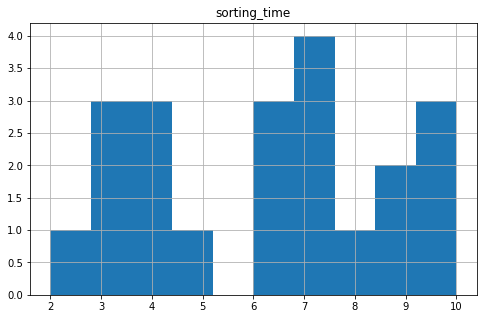

In [34]:
data_del['log-sort']=np.log(data_del["sorting_time"])
data_del.hist('sorting_time',figsize=(8,5))

In [44]:
data_del.describe()

,delivery_time,sorting_time,log-delv,log-sort
count,21.000000,21.000000,21.000000,21.000000
mean,16.790952,6.190476,1.728470,1.728470
std,5.074901,2.542028,0.467979,0.467979
min,8.000000,2.000000,0.693147,0.693147
25%,13.500000,4.000000,1.386294,1.386294
50%,17.830000,6.000000,1.791759,1.791759
75%,19.750000,8.000000,2.079442,2.079442
max,29.000000,10.000000,2.302585,2.302585


## Normalizing the data

In [35]:
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

In [45]:
data_del.head().values

array([[21.  , 10.  ,  2.3 ,  2.3 ],
       [13.5 ,  4.  ,  1.39,  1.39],
       [19.75,  6.  ,  1.79,  1.79],
       [24.  ,  9.  ,  2.2 ,  2.2 ],
       [29.  , 10.  ,  2.3 ,  2.3 ]])

In [46]:
array = data_del.values

scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(array[:,0:5])

#transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])

[[0.62 1.   1.   1.  ]
 [0.26 0.25 0.43 0.43]
 [0.56 0.5  0.68 0.68]
 [0.76 0.88 0.93 0.93]
 [1.   1.   1.   1.  ]]


In [47]:
# Standardize data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler

In [48]:
array = data_del.values
scaler = StandardScaler().fit(array)
rescaledX = scaler.transform(array)

# summarize transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])

[[ 0.85  1.54  1.26  1.26]
 [-0.66 -0.88 -0.75 -0.75]
 [ 0.6  -0.08  0.14  0.14]
 [ 1.46  1.13  1.03  1.03]
 [ 2.47  1.54  1.26  1.26]]


## Data is cleaned 

## Correlation

In [49]:
data_del.corr()

,delivery_time,sorting_time,log-delv,log-sort
delivery_time,1.000000,0.825997,0.833933,0.833933
sorting_time,0.825997,1.000000,0.977447,0.977447
log-delv,0.833933,0.977447,1.000000,1.000000
log-sort,0.833933,0.977447,1.000000,1.000000


c:\users\damanjeet kaur.laptop-b5chj9sc\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='delivery_time', ylabel='Density'>

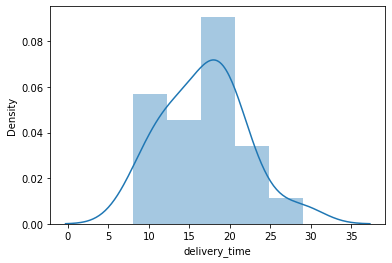

In [50]:
import seaborn as sns
sns.distplot(data_del["delivery_time"])

c:\users\damanjeet kaur.laptop-b5chj9sc\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sorting_time', ylabel='Density'>

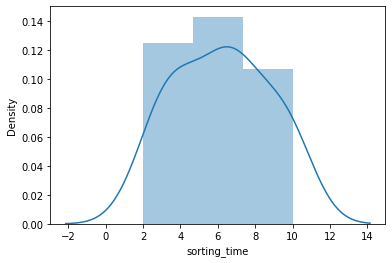

In [51]:
sns.distplot(data_del["sorting_time"])

# Fitting a Linear Regression Model

In [52]:
import statsmodels.formula.api as smf
model = smf.ols("delivery_time~sorting_time",data = data_del).fit()

In [53]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 27 Nov 2021   Prob (F-statistic):           3.98e-06
Time:                        01:04:18   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='delivery_time', ylabel='sorting_time'>

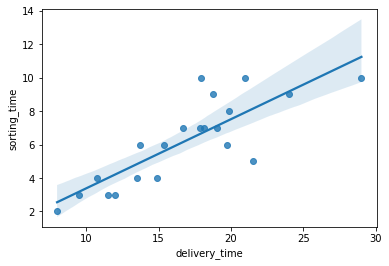

In [54]:
sns.regplot(x='delivery_time',y='sorting_time',data=data_del)

## Coefficients

In [55]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

## t-values and p-values

In [56]:
print(model.tvalues, '\n', model.pvalues)

Intercept       3.823349
sorting_time    6.387447
dtype: float64 
 Intercept       0.001147
sorting_time    0.000004
dtype: float64


### p-value is less than 0.05

## R-squared value

In [57]:
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [58]:
preds=model.predict(data_del.sorting_time)
preds

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

## RMSE

In [60]:
np.sqrt(np.mean((data_del.delivery_time - preds)**2)) 

2.7916503270617654

# Predict for new data point

In [61]:
new_data=pd.Series([300,400])

In [62]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])

In [63]:
model.predict(data_pred)

0    501.288703
1    666.190693
dtype: float64

# SALARY DATA

In [64]:
data1=pd.read_csv("Salary_data.csv")
df2=pd.DataFrame(data1)
df2.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [65]:
df2.shape

(30, 2)

In [66]:
df2.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [67]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [68]:
data2=df2.rename({'YearsExperience':'year_exp'},axis=1)
data2.head(2)

,year_exp,Salary
0,1.1,39343.0
1,1.3,46205.0


## Checking for outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x23ab9805748>,
 'caps': [<matplotlib.lines.Line2D at 0x23ab9805cf8>,
 'boxes': [<matplotlib.lines.Line2D at 0x23ab9805400>],
 'medians': [<matplotlib.lines.Line2D at 0x23ab98132e8>],
 'fliers': [<matplotlib.lines.Line2D at 0x23ab98135c0>],
 'means': []}

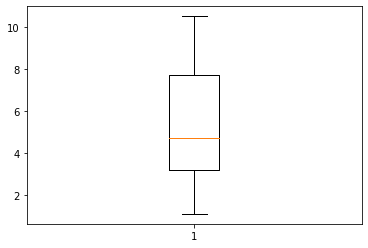

In [69]:
plt.boxplot(data2["year_exp"])

{'whiskers': [<matplotlib.lines.Line2D at 0x23ab9872ac8>,
 'caps': [<matplotlib.lines.Line2D at 0x23ab98820b8>,
 'boxes': [<matplotlib.lines.Line2D at 0x23ab9872780>],
 'medians': [<matplotlib.lines.Line2D at 0x23ab9882668>],
 'fliers': [<matplotlib.lines.Line2D at 0x23ab9882940>],
 'means': []}

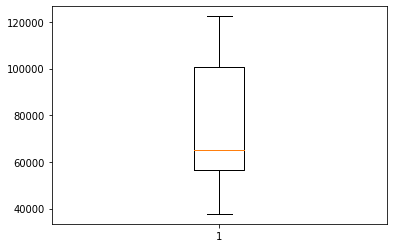

In [70]:
plt.boxplot(data2["Salary"])

### therefore no outliers detected.

## Normalizing the data

## To distribute data normally

array([[<AxesSubplot:title={'center':'year_exp'}>]], dtype=object)

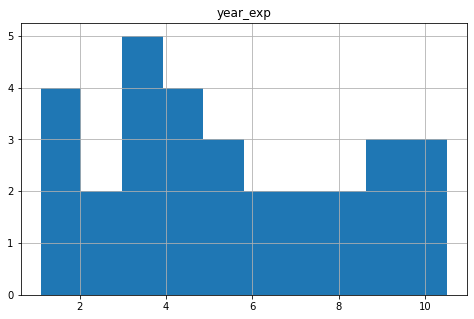

In [75]:
data2['log-exp']=np.log(data2["year_exp"])
data2.hist('year_exp',figsize=(8,5))

array([[<AxesSubplot:title={'center':'Salary'}>]], dtype=object)

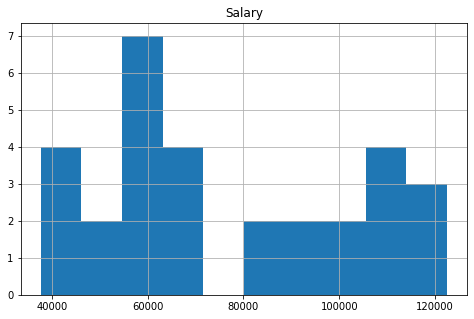

In [76]:
data2['log-sal']=np.log(data2["Salary"])
data2.hist('Salary',figsize=(8,5))

In [77]:
data2.head().values

array([[1.10e+00, 3.93e+04, 9.53e-02, 1.06e+01],
       [1.30e+00, 4.62e+04, 2.62e-01, 1.07e+01],
       [1.50e+00, 3.77e+04, 4.05e-01, 1.05e+01],
       [2.00e+00, 4.35e+04, 6.93e-01, 1.07e+01],
       [2.20e+00, 3.99e+04, 7.88e-01, 1.06e+01]])

In [78]:
array = data2.values

scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(array[:,0:5])

#transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])

[[0.   0.02 0.   0.04]
 [0.02 0.1  0.07 0.17]
 [0.04 0.   0.14 0.  ]
 [0.1  0.07 0.26 0.12]
 [0.12 0.03 0.31 0.05]]


In [79]:
array = data2.values
scaler = StandardScaler().fit(array)
rescaledX = scaler.transform(array)

# summarize transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])

[[-1.51 -1.36 -2.3  -1.64]
 [-1.44 -1.11 -2.02 -1.19]
 [-1.37 -1.42 -1.79 -1.75]
 [-1.19 -1.2  -1.32 -1.36]
 [-1.12 -1.34 -1.17 -1.6 ]]


## Data is cleaned 

## Correlation

In [80]:
data2.corr()

,year_exp,Salary,log-exp,log-sal
year_exp,1.000000,0.978242,0.953797,0.965384
Salary,0.978242,1.000000,0.924061,0.988531
log-exp,0.953797,0.924061,1.000000,0.951428
log-sal,0.965384,0.988531,0.951428,1.000000


c:\users\damanjeet kaur.laptop-b5chj9sc\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='year_exp', ylabel='Density'>

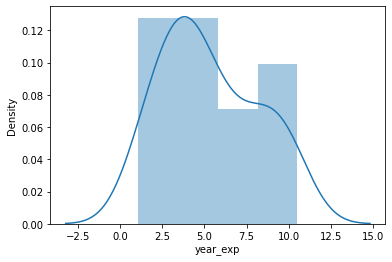

In [81]:
sns.distplot(data2["year_exp"])

c:\users\damanjeet kaur.laptop-b5chj9sc\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

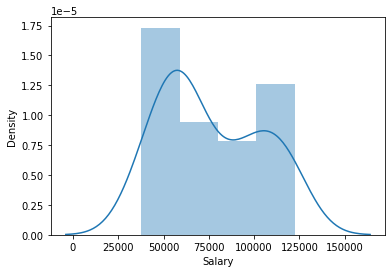

In [82]:
sns.distplot(data2["Salary"])

# Fitting a Linear Regression Model

In [83]:
model2=smf.ols("Salary~year_exp",data=data2).fit()

In [84]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sat, 27 Nov 2021   Prob (F-statistic):           1.14e-20
Time:                        01:27:13   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
year_exp    9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='year_exp', ylabel='Salary'>

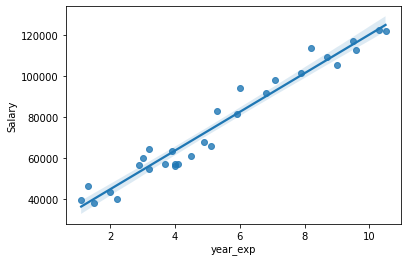

In [85]:
sns.regplot(x='year_exp',y='Salary',data=data2)

## Coefficients

In [86]:
model2.params

Intercept    25792.200199
year_exp      9449.962321
dtype: float64

## t-values and p-values

In [87]:
print(model2.tvalues, '\n' , model2.pvalues)

Intercept    11.346940
year_exp     24.950094
dtype: float64 
 Intercept    5.511950e-12
year_exp     1.143068e-20
dtype: float64


## R-squared value

In [88]:
(model2.rsquared,model2.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

In [89]:
preds=model2.predict(data2.year_exp)
preds

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

## RMSE

In [90]:
np.sqrt(np.mean((data2.Salary - preds)**2)) 

5592.043608760662

# Predict for new data

In [91]:
new_data2=pd.Series([2,3])

In [92]:
data_pred2=pd.DataFrame(new_data2,columns=['year_exp'])
data_pred2

,year_exp
0,2
1,3


In [93]:
model2.predict(data_pred2)

0    44692.124842
1    54142.087163
dtype: float64